<a href="https://colab.research.google.com/github/sanyasana1/Chiselni_methodi/blob/main/%D0%9B%D1%80_13_%D0%9B%D0%B0%D0%B7%D0%B0%D1%80%D0%B5%D0%BD%D0%BA%D0%BE_%D0%9E_%D0%92_%D0%B2%D0%B0%D1%80%D1%96%D0%B0%D0%BD%D1%82_14.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Лабораторна робота 13.

#Метод Ейлера

x = [0.5 0.6 0.7 0.8 0.9 1.  1.1 1.2 1.3 1.4 1.5] 
y = [0.6    0.6725 0.7576 0.8559 0.9677 1.0934 1.2336 1.3885 1.5586 1.7442
 1.9455]


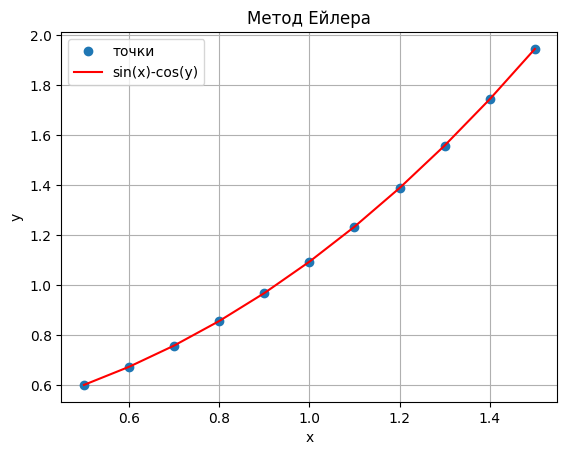

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def f(x, y):
    return x + np.sin(y/np.sqrt(7))

# Вводимо параметри (ліва, права межі відрізку, крок, початкова умова)
a, b, h, y0 = 0.5, 1.5, 0.1, 0.6

# Перевірка вхідних параметрів
if h <= 0:
    print("Крок h повинен бути позитивним.")
    exit()
if a >= b:
    print("Права межа b повинна бути більшою за ліву межу a.")
    exit()

n = int((b - a) / h) # кількість кроків

x = np.array([a + i*h for i in range(n + 1)]) # задаємо x генератором списків

y = np.empty(n + 1)
y[0] = y0

for i in range(n):
    y[i + 1] = y[i] + f(x[i], y[i]) * h

y_rounded = np.round(y, 4)
print("x =", x, "\ny =", y_rounded)

plt.plot(x, y, "o", x, y, "red")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Метод Ейлера")
plt.legend(["точки", "sin(x)-cos(y)"])
plt.grid()
plt.show()

#Розв’язок диф. Рівняння за допомогою scipy.integrate import odeint

x= [0.5 0.6 0.7 0.8 0.9 1.  1.1 1.2 1.3 1.4]
y= [0.6        0.67889392 0.77090927 0.87649838 0.99610819 1.13017168
 1.27909723 1.443255   1.62296035 1.81845456]


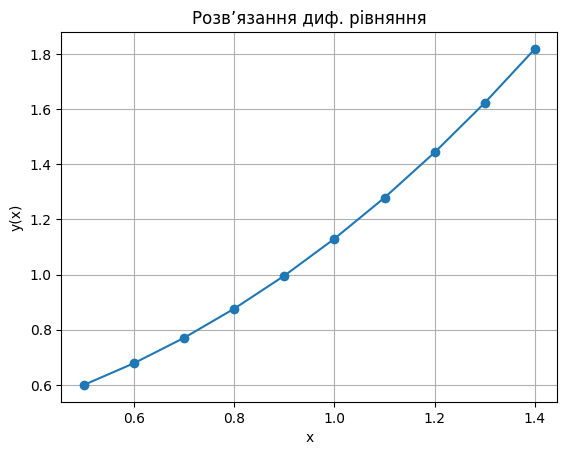

In [ ]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

# Функція, що повертає dy/dx
def model(y, x):
    return x + np.sin(y/np.sqrt(7))

# Початкова умова
y0 = 0.6

# Значення x
x = np.array([i * 0.1 for i in range(5, 15)])

# Розв'язання ODE
y = odeint(model, y0, x)

# Виведення результатів
print('x=', x)
print('y=', y.flatten())  # Перетворення в одновимірний масив для виводу

# Побудова графіка результатів
plt.plot(x, y, marker='o')
plt.xlabel('x')
plt.ylabel('y(x)')
plt.title('Розв’язання диф. рівняння')
plt.grid()
plt.show()


#Використання scipy.integrate.solve_ivp
Функція solve_ivp є більш сучасним і гнучким способом розв'язання ODE, ніж odeint. Вона також дозволяє використовувати різні методи інтегрування.

x= [0.5 0.6 0.7 0.8 0.9 1.  1.1 1.2 1.3 1.4 1.5]
y= [0.6        0.67889321 0.77088131 0.87644604 0.99606361 1.13016561
 1.27913903 1.44332621 1.62302489 1.81848819 2.02990905]


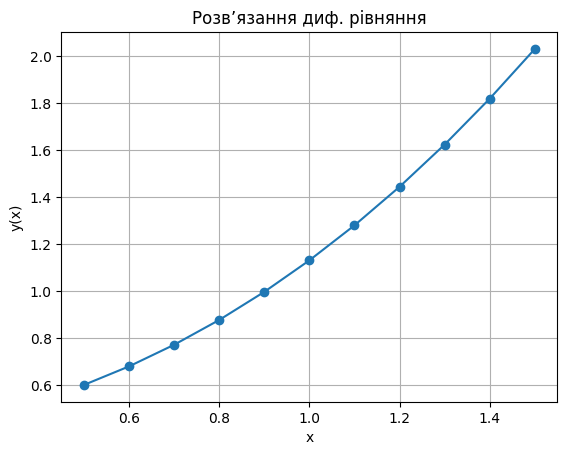

In [ ]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

# Функція, що повертає dy/dx
def model(x, y):
    return x + np.sin(y/np.sqrt(7))

# Початкова умова
y0 = [0.6]  # Потрібно передати як список

# Значення x
x = np.linspace(0.5, 1.5, 11)

# Розв'язання ODE
sol = solve_ivp(model, [0.5, 1.5], y0, t_eval=x)

# Виведення результатів
print('x=', sol.t)
print('y=', sol.y[0])

# Побудова графіка результатів
plt.plot(sol.t, sol.y[0], marker='o')
plt.xlabel('x')
plt.ylabel('y(x)')
plt.title('Розв’язання диф. рівняння')
plt.grid()
plt.show()


#Метод Ейлера-Коші

x = [1.4 1.5 1.6 1.7 1.8 1.9 2.  2.1 2.2 2.3 2.4] 
y = [2.5    2.7026 2.9089 3.1185 3.331  3.5461 3.7635 3.9831 4.2045 4.4279
 4.6529]


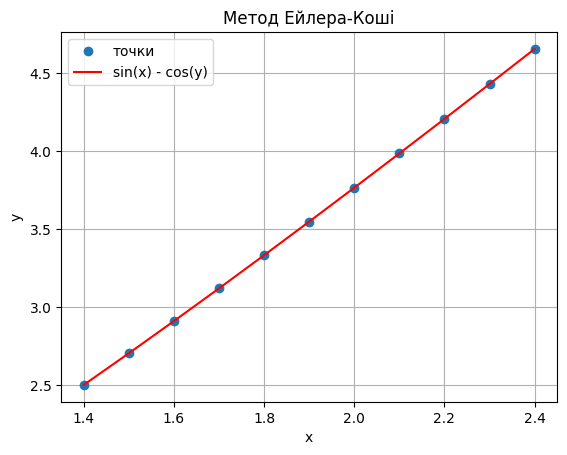

In [ ]:
import numpy as np
import math
import matplotlib.pyplot as plt

e = math.exp(1)

def f(x, y):
    return x + np.cos(y/e)

a = 1.4  # ліва межа відрізку
b =  2.4 # права межа відрізку
h = 0.1  # крок
y0 = 2.5  # початкова умова
n = int((b - a) / h)  # кількість кроків

# Генерація x, враховуючи останнє значення
x = np.arange(a, b + h, h)  # Задати x з включенням b

y = np.empty(n + 1)
y[0] = y0

# Метод Ейлера-Коші
for i in range(n):
    # Використовується середнє значення для нахилу
    y[i + 1] = y[i] + (f(x[i], y[i]) + f(x[i + 1], y[i] + h * f(x[i], y[i]))) * h / 2

y_rounded = np.round(y, 4)

print("x =", x, "\ny =", y_rounded)

# Візуалізація
plt.plot(x, y, "o", x, y, "red")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Метод Ейлера-Коші")
plt.legend(["точки", "sin(x) - cos(y)"])
plt.grid()
plt.show()
